# Wine Quality

Problema relacionado con muestras de vino tinto y vino blanco. El objetivo es predecir la calidad del vino basado en un grupo de pruebas físico-químicas. Los datos referentes a la calidad del vino blanco contienen 4898 casos y 12 atributos modelando un problema de regresión.

## PyTorch

Hemos seleccionado PyTorch para el desarrollo del proyecto.

PyTorch puede utilizarse en al menos estas dos tareas:
- Reemplazar operaciones similares a NumPy con operaciones aceleradas por GPU
- Contruir deep neural networks

PyTorch usa ampliamente los conceptos de Python, como clases, estructuras y bucles condicionales, lo que nos permite construir algoritmos DL de una manera puramente orientada a objetos.

In [11]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
from torch.utils.tensorboard import SummaryWriter

In [12]:
writer = SummaryWriter()

In [13]:
data = pd.read_csv('dataset/winequality-white.csv', sep=";")

In [14]:
# See the number of rows and columns
print("Rows, columns: " + str(data.shape))

Rows, columns: (4898, 12)


In [15]:
# See the first five rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
# Missing Values
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [17]:
# Histogram of ‘quality’ variable
fig = px.histogram(data, x='quality')
fig.show()

<AxesSubplot:>

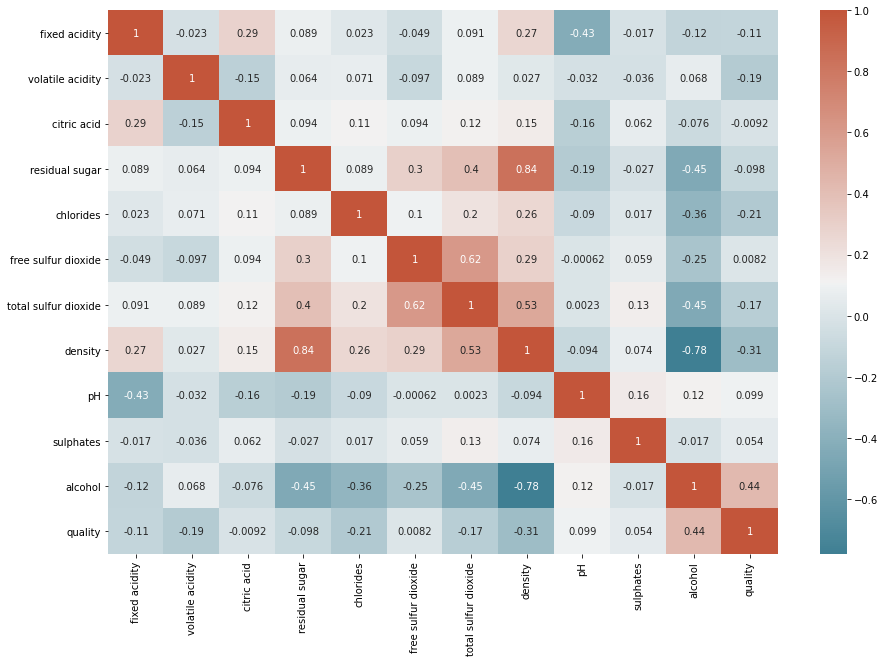

In [18]:
# Correlation Matrix
corr = data.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler

class FeatureDataset(Dataset):
    def __init__(self, file_name):
        # Read csv file and load row data into variables
        file_out = pd.read_csv(file_name, sep=";")
        x = file_out.iloc[0:4898, 0:11].values
        y = file_out.iloc[0:4898, 11].values - 3
        
        # Feature Scaling
        sc = StandardScaler()
        x_train = sc.fit_transform(x)
        y_train = y
        
        # Converting to torch tensor
        self.X_train = torch.tensor(x_train, dtype=torch.float32)
        self.y_train = torch.tensor(y_train)
    
    def __len__(self):
        return len(self.y_train)
    
    def __getitem__(self, idx):
        return self.X_train[idx], self.y_train[idx]

feature_set = FeatureDataset('dataset/winequality-white.csv')
train_loader = torch.utils.data.DataLoader(feature_set, batch_size=10, shuffle=True)

# Defining ANN architecture
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(11, 120)
        self.l2 = nn.Linear(120, 320)
        self.l3 = nn.Linear(320, 7)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.softmax(self.l2(x))
        return self.l3(x)

model = Net()

# Defining loss function and optimizer
loss_func = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

# Train
epochs = 50

for e in range(epochs):
    running_loss = 0
    for features, labels in train_loader:
        # Forward pass
        output = model(features)
        loss = loss_func(output, labels)
        writer.add_scalar("Loss/train", loss, e)
        # Clear previous gradients
        optimizer.zero_grad()
        # Backward pass
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
else:
    print(loss.item())
writer.flush()

/home/maite/anaconda3/envs/deep/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



-136.4624481201172


In [ ]:
writer.close()